In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HRData.csv")

In [3]:
df.head(5)

,EmployeeID,EmployeeName,Salary,Position,State,DateOfBirth,Gender,MaritalStatus,HiringDate,TerminationDate,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmployeeSatisfaction
0,1,John Smith,62506,Production Technician I,MA,07/10/83,M,Single,7/5/2011,NaN,Active,Production,LinkedIn,Exceeds,4.60,5
1,2,Sarah Johnson,104437,Sr. DBA,MA,05/05/75,M,Married,3/30/2015,6/16/2016,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3
2,3,Michael Williams,64955,Production Technician II,MA,09/19/88,F,Married,7/5/2011,9/24/2012,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3
3,4,Emily Brown,64991,Production Technician I,MA,09/27/88,F,Married,1/7/2008,NaN,Active,Production,Indeed,Fully Meets,4.84,5
4,5,David Jones,50825,Production Technician I,MA,09/08/89,F,Divorced,7/11/2011,9/6/2016,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4


In [4]:
df.isnull().sum()


EmployeeID                0
EmployeeName              0
Salary                    0
Position                  0
State                     0
DateOfBirth               0
Gender                    0
MaritalStatus             0
HiringDate                0
TerminationDate         207
EmploymentStatus          0
Department                0
RecruitmentSource         0
PerformanceScore          0
EngagementSurvey          0
EmployeeSatisfaction      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            311 non-null    int64  
 1   EmployeeName          311 non-null    object 
 2   Salary                311 non-null    int64  
 3   Position              311 non-null    object 
 4   State                 311 non-null    object 
 5   DateOfBirth           311 non-null    object 
 6   Gender                311 non-null    object 
 7   MaritalStatus         311 non-null    object 
 8   HiringDate            311 non-null    object 
 9   TerminationDate       104 non-null    object 
 10  EmploymentStatus      311 non-null    object 
 11  Department            311 non-null    object 
 12  RecruitmentSource     311 non-null    object 
 13  PerformanceScore      311 non-null    object 
 14  EngagementSurvey      311 non-null    float64
 15  EmployeeSatisfaction  3

In [6]:
df.describe()

,EmployeeID,Salary,EngagementSurvey,EmployeeSatisfaction
count,311.000000,311.000000,311.000000,311.000000
mean,156.000000,69020.684887,4.110000,3.890675
std,89.922189,25156.636930,0.789938,0.909241
min,1.000000,45046.000000,1.120000,1.000000
25%,78.500000,55501.500000,3.690000,3.000000
50%,156.000000,62810.000000,4.280000,4.000000
75%,233.500000,72036.000000,4.700000,5.000000
max,311.000000,250000.000000,5.000000,5.000000


In [7]:
df.drop("TerminationDate",axis=1,inplace=True)

In [8]:
df.head()

,EmployeeID,EmployeeName,Salary,Position,State,DateOfBirth,Gender,MaritalStatus,HiringDate,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmployeeSatisfaction
0,1,John Smith,62506,Production Technician I,MA,07/10/83,M,Single,7/5/2011,Active,Production,LinkedIn,Exceeds,4.60,5
1,2,Sarah Johnson,104437,Sr. DBA,MA,05/05/75,M,Married,3/30/2015,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3
2,3,Michael Williams,64955,Production Technician II,MA,09/19/88,F,Married,7/5/2011,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3
3,4,Emily Brown,64991,Production Technician I,MA,09/27/88,F,Married,1/7/2008,Active,Production,Indeed,Fully Meets,4.84,5
4,5,David Jones,50825,Production Technician I,MA,09/08/89,F,Divorced,7/11/2011,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4


In [9]:
# Create binary Attrition column (1 = left the company, 0 = still active)
df["Attrition"] = df["EmploymentStatus"].apply(lambda x: 0 if x == "Active" else 1)

In [10]:
df.head()

,EmployeeID,EmployeeName,Salary,Position,State,DateOfBirth,Gender,MaritalStatus,HiringDate,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmployeeSatisfaction,Attrition
0,1,John Smith,62506,Production Technician I,MA,07/10/83,M,Single,7/5/2011,Active,Production,LinkedIn,Exceeds,4.60,5,0
1,2,Sarah Johnson,104437,Sr. DBA,MA,05/05/75,M,Married,3/30/2015,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,1
2,3,Michael Williams,64955,Production Technician II,MA,09/19/88,F,Married,7/5/2011,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,1
3,4,Emily Brown,64991,Production Technician I,MA,09/27/88,F,Married,1/7/2008,Active,Production,Indeed,Fully Meets,4.84,5,0
4,5,David Jones,50825,Production Technician I,MA,09/08/89,F,Divorced,7/11/2011,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,1


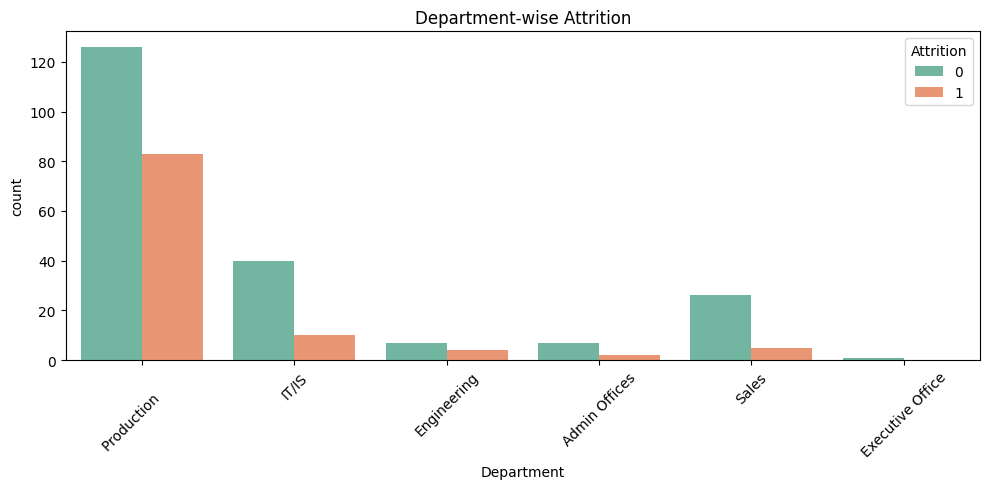

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set2")
plt.title("Department-wise Attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Create salary bands using bins

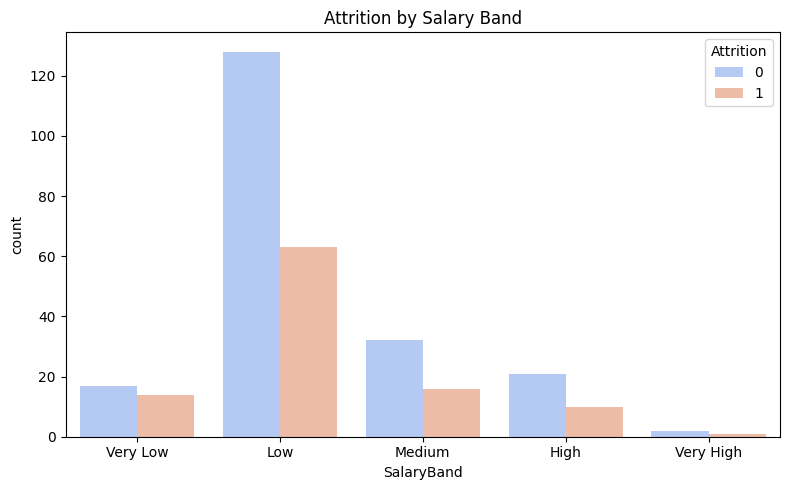

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df["SalaryBand"] = pd.cut(df["Salary"], bins=[0, 50000, 70000, 90000, 120000, 150000],
                          labels=["Very Low", "Low", "Medium", "High", "Very High"])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="SalaryBand", hue="Attrition", palette="coolwarm")
plt.title("Attrition by Salary Band")
plt.tight_layout()
plt.show()


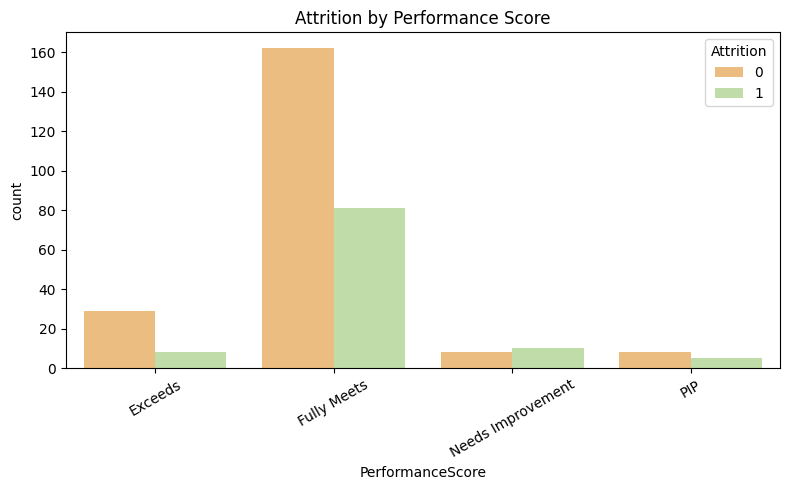

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="PerformanceScore", hue="Attrition", palette="Spectral")
plt.title("Attrition by Performance Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\sarve\AppData\Local\Temp\ipykernel_12212\2925903478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="EngagementSurvey", palette="Set1")


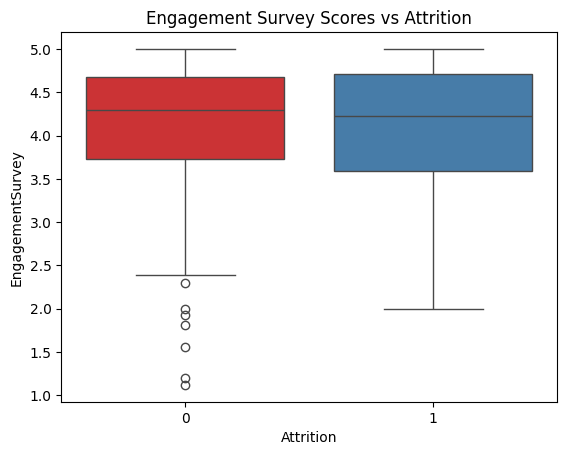

C:\Users\sarve\AppData\Local\Temp\ipykernel_12212\2925903478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="EmployeeSatisfaction", palette="Set2")


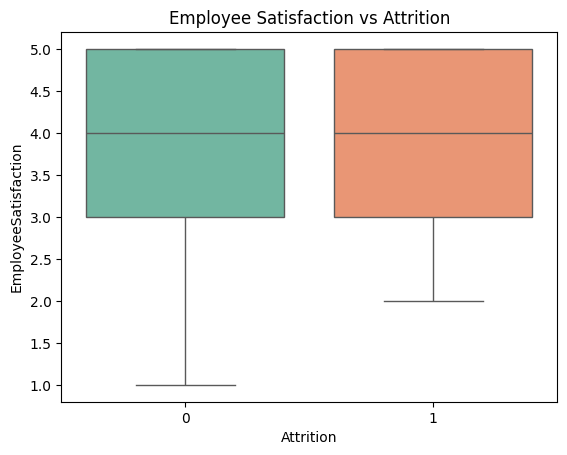

In [13]:
sns.boxplot(data=df, x="Attrition", y="EngagementSurvey", palette="Set1")
plt.title("Engagement Survey Scores vs Attrition")
plt.show()

sns.boxplot(data=df, x="Attrition", y="EmployeeSatisfaction", palette="Set2")
plt.title("Employee Satisfaction vs Attrition")
plt.show()
